In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('FullData.csv')
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


In [12]:
del df['National_Kit'] #deletes Nation_kit

df.head()

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


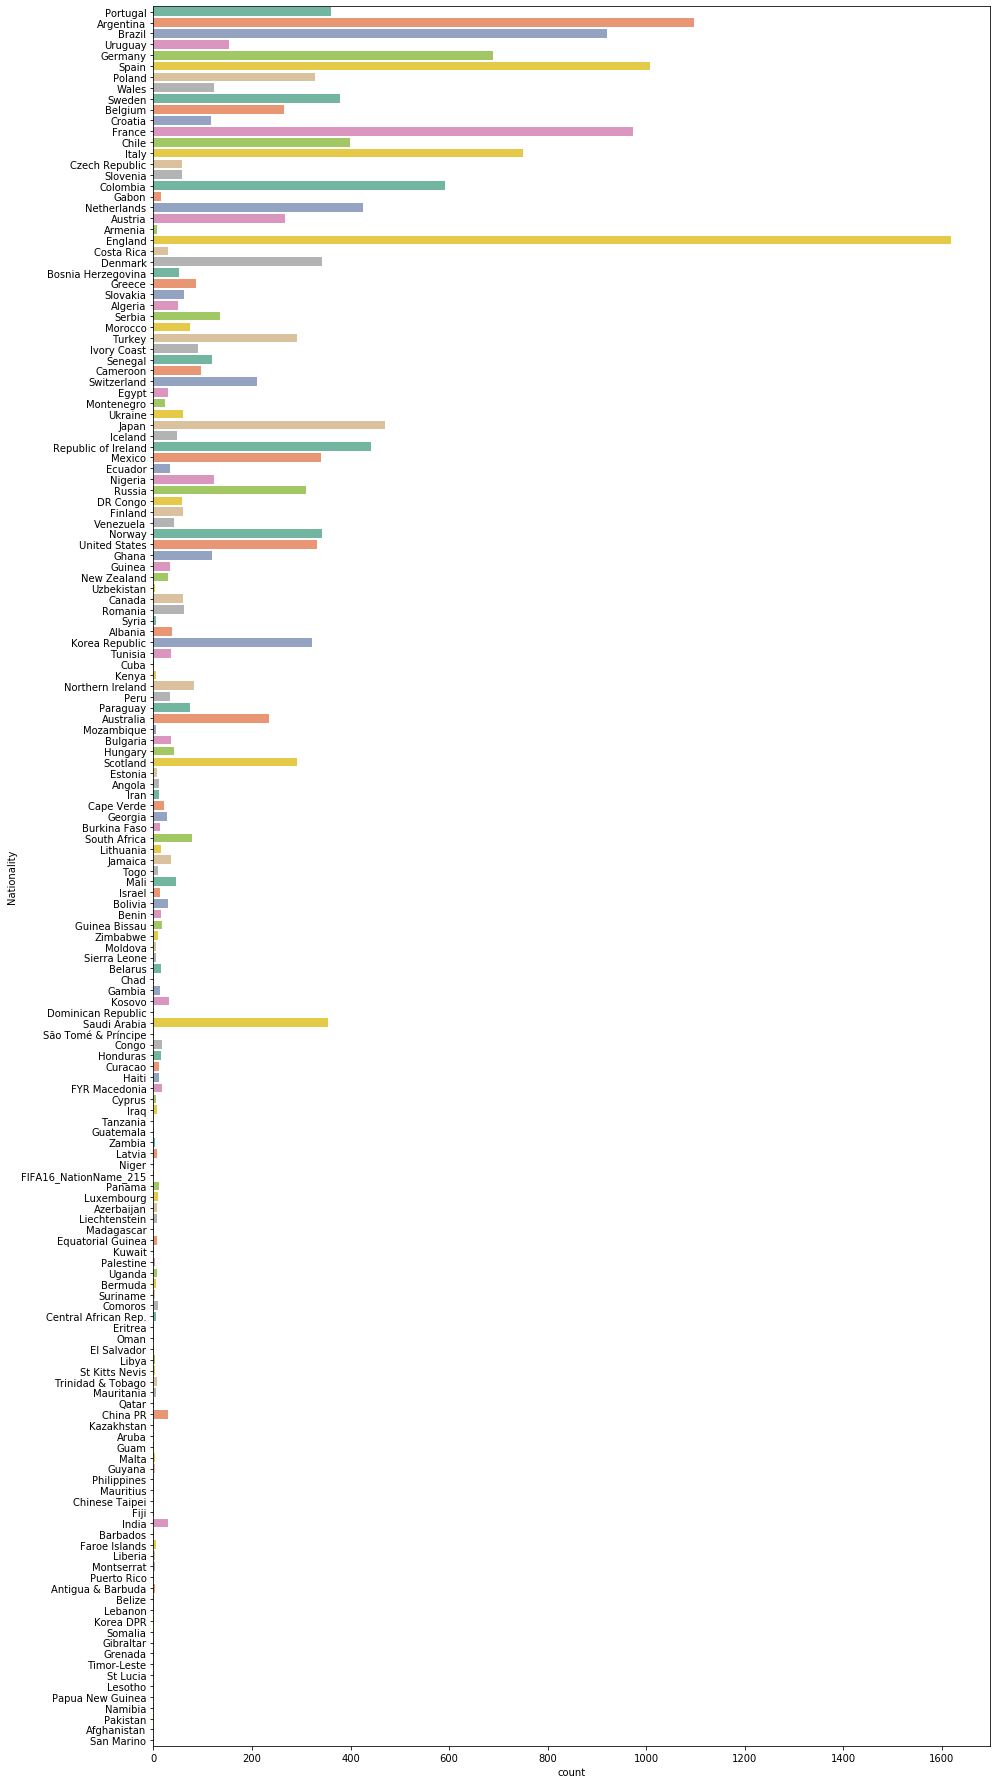

In [13]:
plt.figure(figsize=(15,32))

sns.countplot(y = df.Nationality, palette='Set2') #Plot al the notions on Y axis

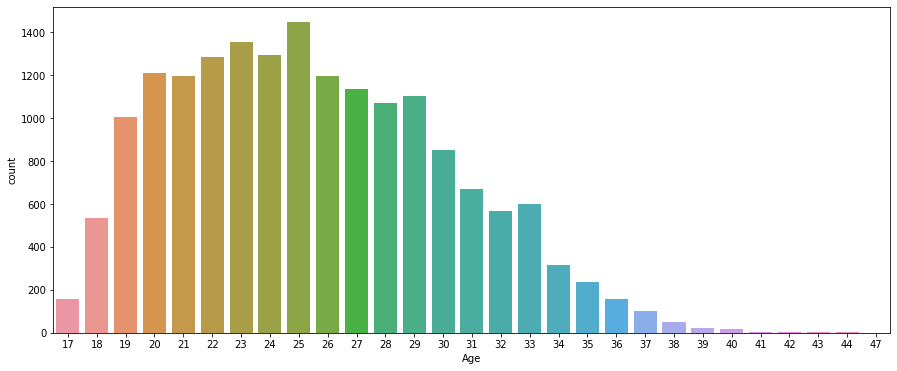

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', data=df)

## Best Goal Keeper

In [17]:
#weights
a = .5
b = 1
c = 2
d = 3

In [18]:
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b+ 2*c + d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 7*b + c + 2*d)


Text(0, 0.5, 'Shot Stopping Score')

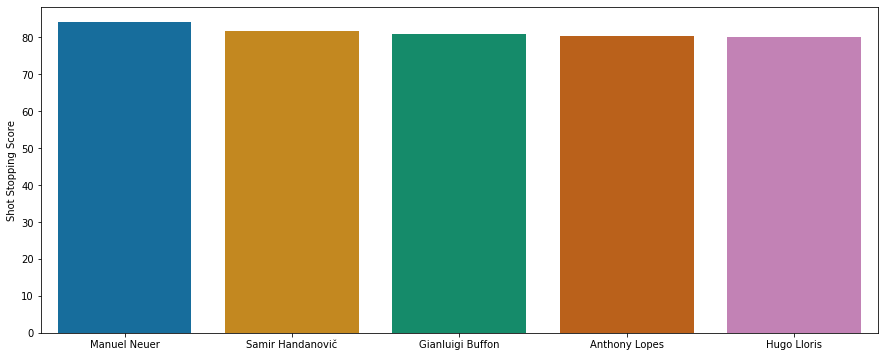

In [21]:
plt.figure(figsize=(15,6))

#Genereate sequential data and plot
sd1 = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd1['Name']))
y1 = np.array(list(sd1['gk_Shot_Stopper']))

sns.barplot(x1, y1, palette='colorblind')
plt.ylabel('Shot Stopping Score')

Text(0, 0.5, 'Sweeping Score')

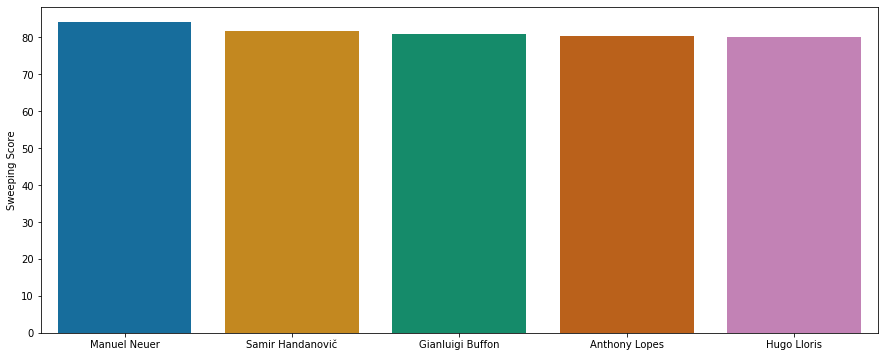

In [24]:
plt.figure(figsize=(15,6))

#Genereate sequential data and plot
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))

sns.barplot(x1, y1, palette='colorblind')
plt.ylabel('Sweeping Score')

## Choosing Defenders

In [28]:
df['df_centre_backs'] = (d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision + b*df.Composure + b*df.Crossing + a*df.Short_Pass + b*df.Long_Pass+c*df.Acceleration + b*df.Speed
                         + d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration + d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)

Text(0, 0.5, 'LCB Score')

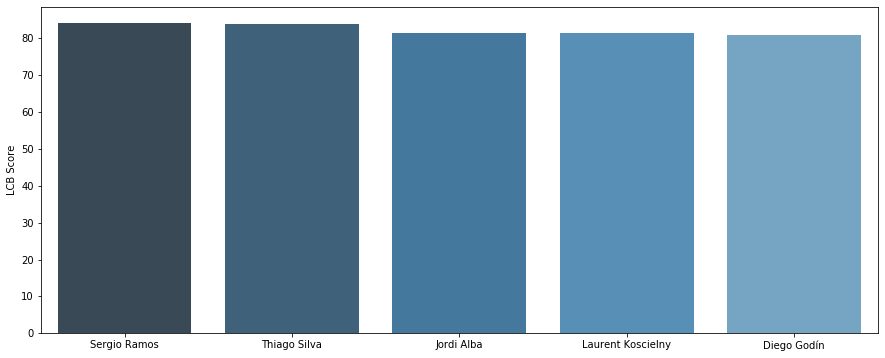

In [30]:
#Plot left central back

plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2,y2,palette=sns.color_palette('Blues_d'))
plt.ylabel('LCB Score')

Text(0, 0.5, 'RCB Score')

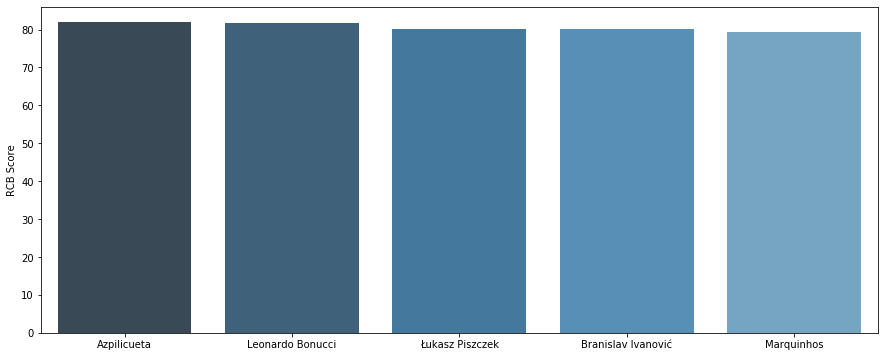

In [31]:
#Plot right central back

plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2,y2,palette=sns.color_palette('Blues_d'))
plt.ylabel('RCB Score')

Text(0, 0.5, 'LWB Score')

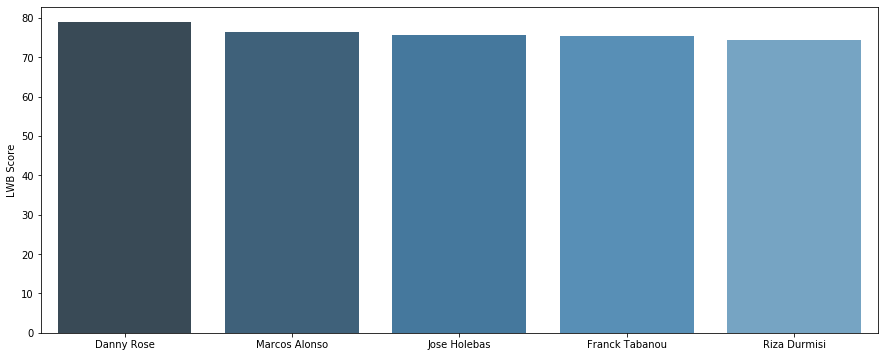

In [36]:
#Plot left wing back

plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LWB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x2,y2,palette=sns.color_palette('Blues_d'))
plt.ylabel('LWB Score')

Text(0, 0.5, 'RWB Score')

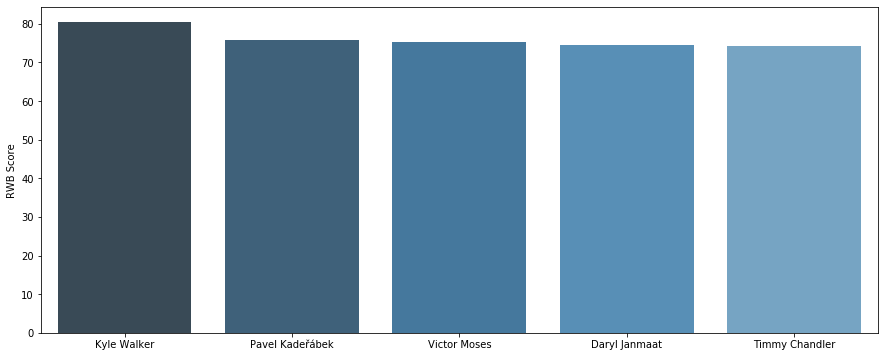

In [37]:
#Plot left wing back

plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RWB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x2,y2,palette=sns.color_palette('Blues_d'))
plt.ylabel('RWB Score')

In [40]:
# Best 3 Mid Fielders
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(a + b + 5*c + 5*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle)/(a + 4*b + 4*c + 4*d)

Text(0, 0.5, 'Controller Score')

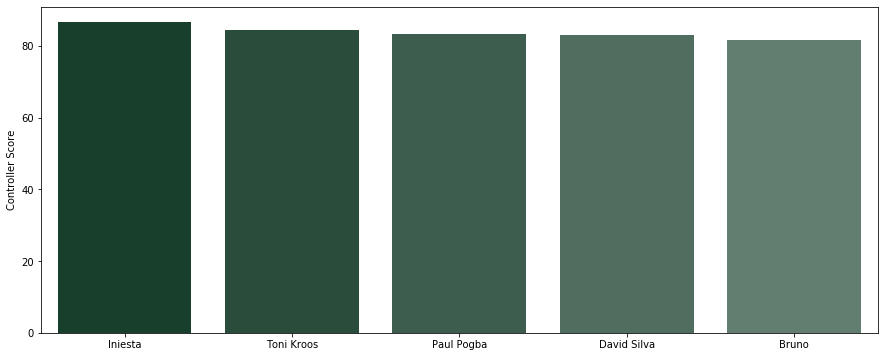

In [45]:
#Plot Controlloer

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145,280, s=85, l=25, n=25))
plt.ylabel('Controller Score')

Text(0, 0.5, 'Playmaker Score')

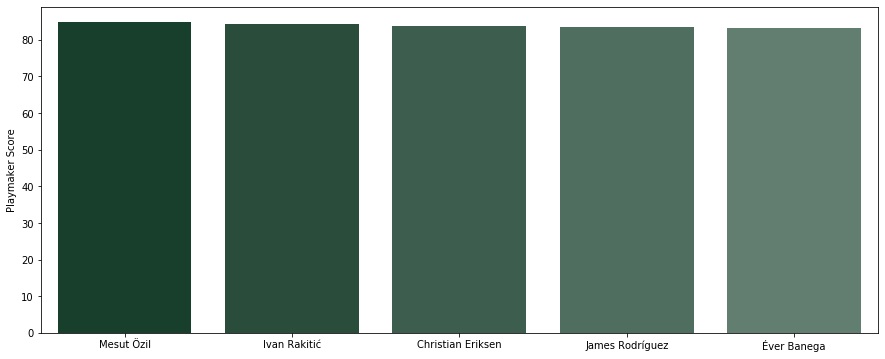

In [56]:
#CAM or LAM for PlayMaker

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM')].sort_values('mf_playmaker',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_playmaker']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145,280, s=85, l=25, n=25))
plt.ylabel('Playmaker Score')

Text(0, 0.5, 'Beast Score')

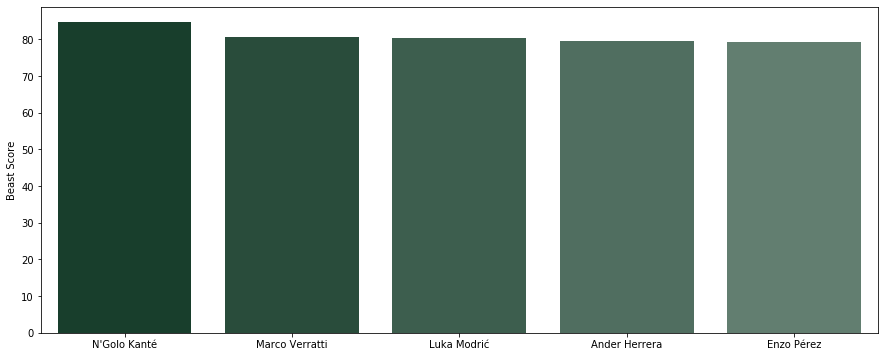

In [57]:
#Beast

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_beast']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145,280, s=85, l=25, n=25))
plt.ylabel('Beast Score')

## Best Three Attackers

In [53]:
#Attackers
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + b*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

Text(0, 0.5, 'Left Wing')

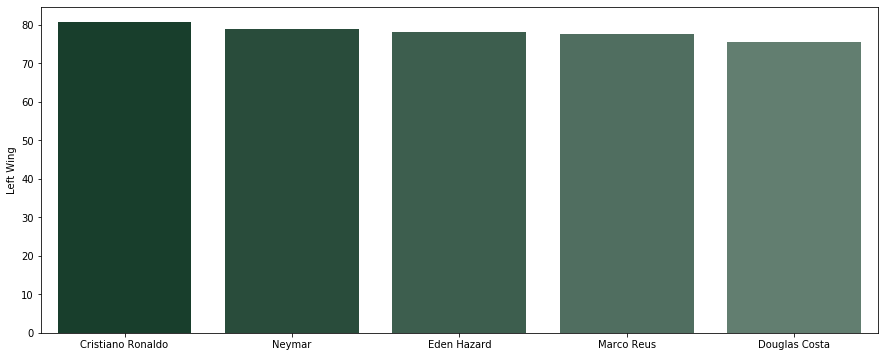

In [58]:
#plot LW

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM')].sort_values('att_left_wing',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145, 280, s=85, l=25, n=25))
plt.ylabel('Left Wing')

Text(0, 0.5, 'Right Wing')

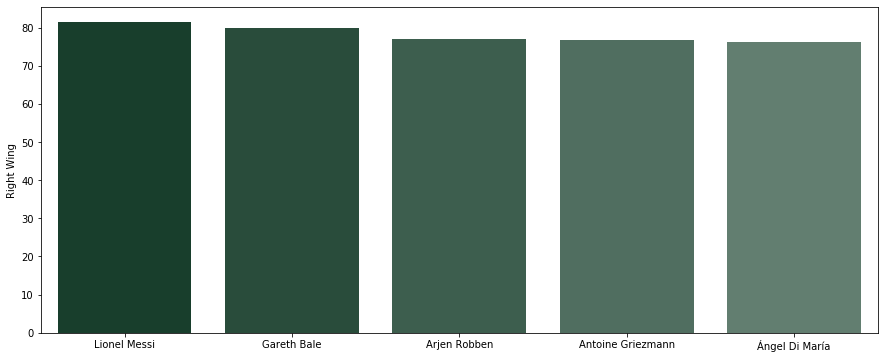

In [67]:
#plot LW

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_right_wing']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145, 280, s=85, l=25, n=25))
plt.ylabel('Right Wing')

Text(0, 0.5, 'Striker')

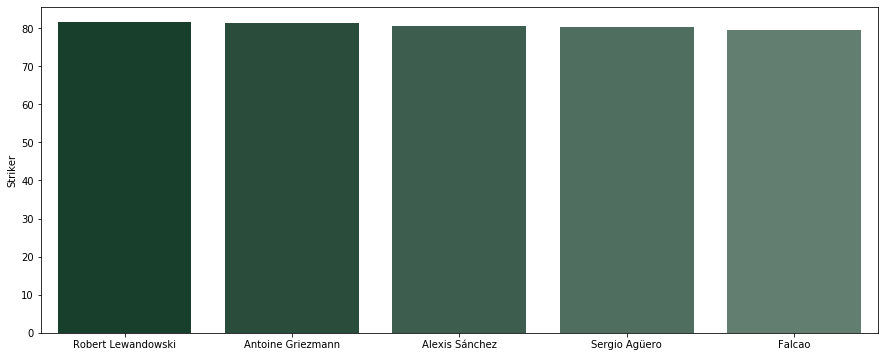

In [79]:
#plot LW

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'LS')].sort_values('att_striker',ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_striker']))
sns.barplot(x1,y1,palette=sns.diverging_palette(145, 280, s=85, l=25, n=25))
plt.ylabel('Striker')